<a href="https://colab.research.google.com/github/leejulie09/projectmanager/blob/main/2_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_03_%E1%84%80%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A9%E1%86%BC%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5_%E1%84%80%E1%85%B5%E1%84%89%E1%85%A1%E1%86%BC%E1%84%8E%E1%85%A5%E1%86%BC%E1%84%82%E1%85%A1%E1%86%AF%E1%84%8A%E1%85%B5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter4: 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석

## 02- 기상청 데이터 분석

---

## 기상청 데이터 분석(종관데이터)

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 [사전준비] 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 1. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 2. 데이터 전처리하기 : 필요한 데이터만 추출하기
 3. 데이터 시각화하기 : 데이터 그래프로 나타내기
 4. 데이터 저장하기 :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [10]:
#한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩(Colab)의 런타임을 재시작 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (54.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [1]:
import pandas  as pd
pd.__version__

'1.5.3'

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
import matplotlib as plt
plt.__version__

'3.7.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---

### 1.데이터 다운로드하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# OBS_ASOS_MNH_~.csv 파일명 데이터를 'weather_data.csv'로 변경하기
file = 'sample_data/weather_data.csv'
# file = 'sample_data/weather_data_recent.csv'
df = pd.read_csv(file, encoding='CP949')

print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


---

### 2.데이터 전처리(가공하기)
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

#### # 데이터 요약

In [2]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55955 entries, 0 to 55954
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  55955 non-null  int64  
 1   지점명                 55955 non-null  object 
 2   일시                  55955 non-null  object 
 3   평균기온(°C)            55327 non-null  float64
 4   최고기온(°C)            55757 non-null  float64
 5   최저기온(°C)            55732 non-null  float64
 6   평균현지기압(hPa)         53517 non-null  float64
 7   평균상대습도(%)           54760 non-null  float64
 8   월합강수량(00~24h만)(mm)  55662 non-null  float64
 9   평균풍속(m/s)           54799 non-null  float64
 10  합계 일조시간(hr)         54575 non-null  float64
 11  최심적설(cm)            11976 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.1+ MB


#### # 기술통계 정보

In [7]:
df.describe() #숫자 데이터인 것만 보임

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,55955.000000,55327.000000,55757.000000,55732.000000,53517.000000,54760.000000,55662.000000,54799.000000,54575.000000,11976.000000
mean,186.960379,12.597059,24.301889,1.974078,1005.823032,69.783346,109.548936,2.321270,188.886023,8.185429
std,62.167835,9.157956,8.028580,10.761579,16.170267,9.897487,120.382089,1.289188,46.186371,14.841091
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,134.000000,4.600000,17.800000,-6.600000,1001.200000,63.000000,30.300000,1.400000,159.000000,1.500000
50%,174.000000,13.100000,25.800000,1.200000,1008.600000,70.000000,67.600000,2.000000,189.300000,4.300000
75%,245.000000,20.900000,31.100000,11.300000,1015.900000,77.000000,144.775000,2.900000,219.300000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [8]:
!pip install missingno

- **행에 결측 데이터 시각화**

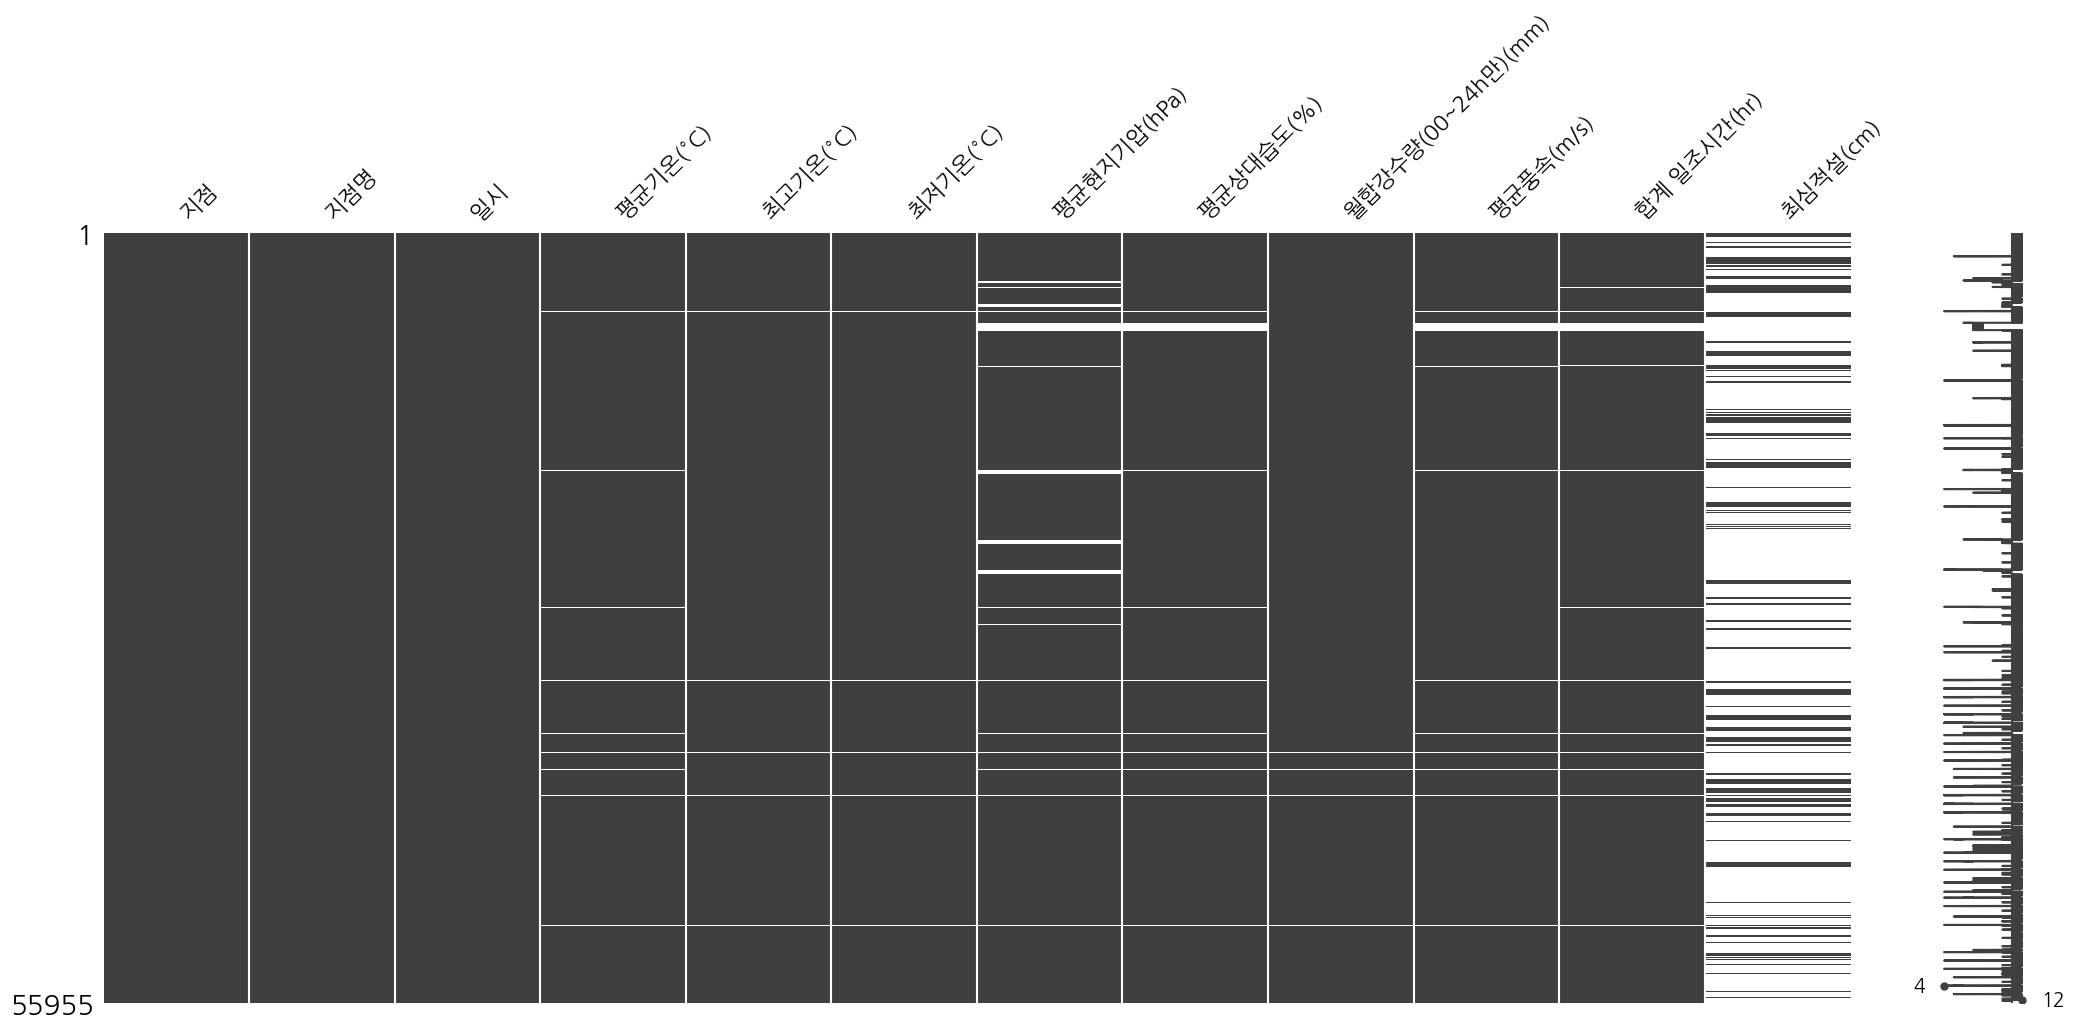

In [5]:
import missingno as msno #흰색이 비어있는거
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # 윈도우용 폰트-코랩용은 해당폰트 지정

msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

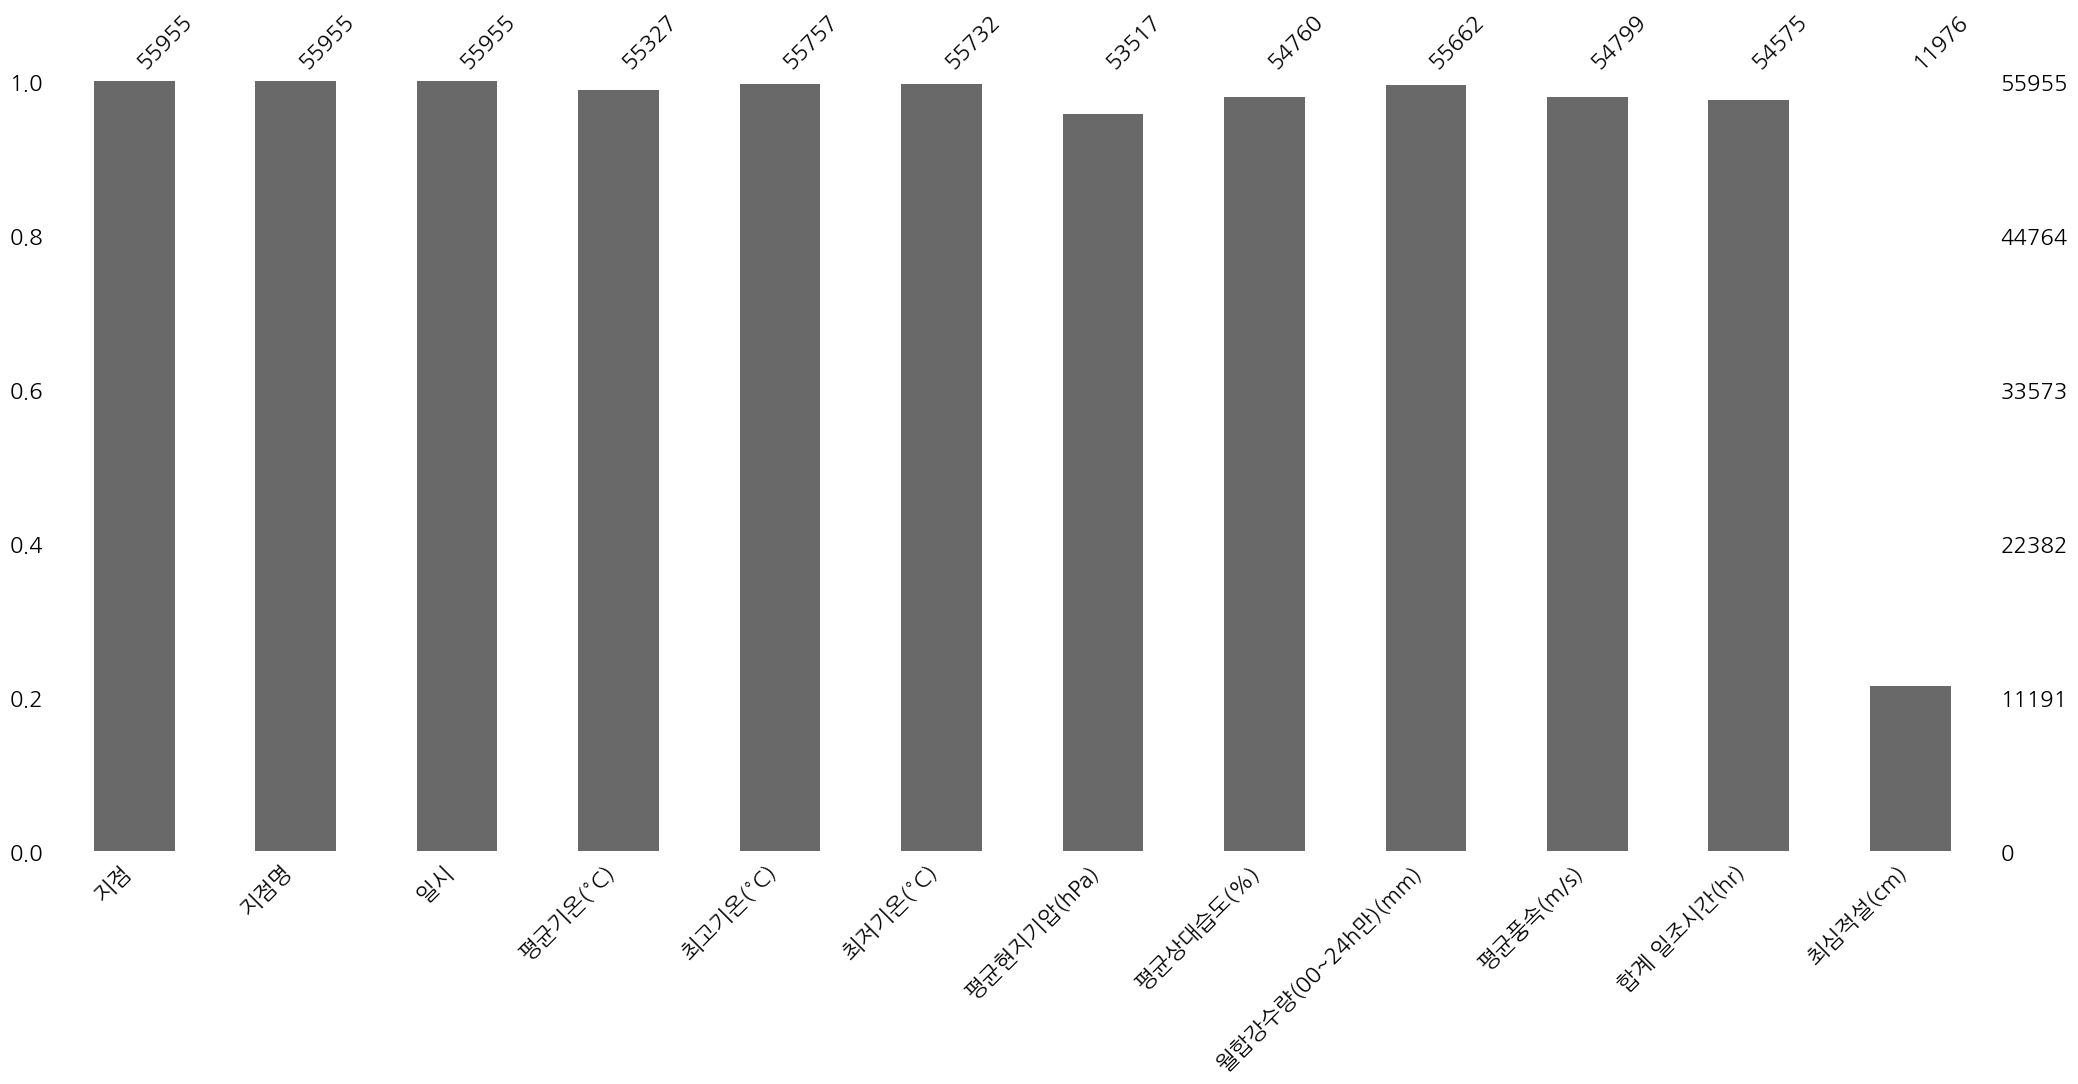

In [6]:
msno.bar(df)
plt.show()

---

#### 2. 컬럼명 변경하기

In [7]:
df.columns
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
       '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.head(3)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 3. 컬럼 추가하기
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [10]:
# df.insert(3,'신규2',df['지점']) #index, 새로운 타이틀, 넣을 테이터 현재 타이틀)
df.head(2)

,지점,지점명,일시,신규2,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [11]:
df.insert(3,'검색일자',df['일시'])
df

,지점,지점명,일시,검색일자,신규2,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968-04,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968-05,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55950,295,남해,2022-12,2022-12,295,2.5,11.8,-6.7,1018.2,58.0,7.8,1.6,187.6,NaN
55951,295,남해,2023-01,2023-01,295,2.8,19.9,-11.7,1018.1,59.0,108.5,1.6,204.7,NaN
55952,295,남해,2023-02,2023-02,295,5.2,15.0,-3.7,1019.0,58.0,34.5,1.3,174.5,NaN
55953,295,남해,2023-03,2023-03,295,11.1,24.1,-1.7,1014.6,61.0,62.4,1.3,217.0,NaN


In [ ]:
df

In [ ]:
df.head(3)

- **문자열에서 특정 문자 제거**: '검색일자' 값중에 '년도-월-일' 형태로 되어 있는 구조에서  '-'기호를 제거

In [17]:
# df['일시'] = df['일시'].str[:4] + '-' + df['일시'].str[4:]
#-다시 넣기

df.head(2)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [20]:
df['검색일자']= df['일시'].str.replace(pat=r'-',repl=r'',regex=True)
#str으로 변환한 이유는 replace가 문자열만 쓸수있는 함수이기 때문
# df.drop('겸색일자', axis=1, inplace=True)
df.head(2)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,196801
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,196802


In [ ]:
df.info()

- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [21]:
df['검색일자'] = df['검색일자'].apply('int64')
df.dtypes

지점          int64
지점명        object
일시         object
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
검색일자        int64
dtype: object

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [22]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes

지점          int64
지점명        object
일시         object
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
검색일자       object
dtype: object

In [23]:
# 년월 추가
df.insert(3,'년도',df['일시'].str[0:4])
df

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,196801
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,196802
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0,196803
3,90,속초,1968-04,1968,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN,196804
4,90,속초,1968-05,1968,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN,196805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55950,295,남해,2022-12,2022,2.5,11.8,-6.7,1018.2,58.0,7.8,1.6,187.6,NaN,202212
55951,295,남해,2023-01,2023,2.8,19.9,-11.7,1018.1,59.0,108.5,1.6,204.7,NaN,202301
55952,295,남해,2023-02,2023,5.2,15.0,-3.7,1019.0,58.0,34.5,1.3,174.5,NaN,202302
55953,295,남해,2023-03,2023,11.1,24.1,-1.7,1014.6,61.0,62.4,1.3,217.0,NaN,202303


#### 4. 컬럼 삭제

In [25]:
# df.drop(['신규','신규2'], axis=1, inplace=True) #여러개 있을때 list안에 넣어서 처리가능
# df.drop('신규2', axis=1, inplace=True)
df.drop('검색일자', axis=1, inplace=True)
df.head(3)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 5. 특정 조건 검색

In [26]:
print( '#지점명 개수: ', len( set(df['지점명']) ) )  #set은 고유함
print( '#지점명: ', set( df['지점명'] ) )

#지점명 개수:  102
#지점명:  {'문경', '북창원', '고창', '진도군', '합천', '무안', '금산', '대관령', '주암', '영천', '서울', '동해', '춘천', '안동', '울진', '제천', '원주', '남원', '강진군', '의성', '진주', '해남', '광양시', '청송군', '성산포', '창원', '북강릉', '순창군', '상주', '정읍', '서산', '강릉', '보령', '고흥', '영주', '밀양', '세종', '함양군', '광주', '구미', '산청', '파주', '태백', '고창군', '성산', '백령도', '남해', '동두천', '양평', '영덕', '보성군', '영월', '포항', '강화', '김해시', '대구(기)', '군산', '울산', '장흥', '여수', '제주', '진도(첨찰산)', '이천', '경주시', '의령군', '울릉도', '임실', '완도', '장수', '전주', '대구', '거창', '천안', '철원', '부산', '삼척', '홍천', '영광군', '홍성', '목포', '부여', '인천', '정선군', '보은', '통영', '충주', '대전', '관악산', '거제', '고산', '봉화', '인제', '청주', '속초', '수원', '흑산도', '서귀포', '순천', '양산시', '추풍령', '부안', '북춘천'}


In [28]:
# 특정년도 데이터
df_2023 = df.query(" 년도 == '2023' ")
# df_2023 = df[ df['년도']=='2023' ]
df_2023.head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
660,90,속초,2023-01,2023,0.2,15.1,-16.0,1019.9,45.0,94.7,2.0,215.7,NaN
661,90,속초,2023-02,2023,2.7,15.6,-6.4,1022.3,53.0,43.4,1.9,186.6,NaN


In [29]:
print( '#지점명 개수: ', len( set(df_2023['지점명']) ) )
print( '#지점명: ', set( df_2023['지점명'] ) )
# print( '#지점명 개수: ', len( set(df[ df['년도']=='2023' ]['지점명']) ) )

#지점명 개수:  95
#지점명:  {'문경', '북창원', '고창', '진도군', '합천', '금산', '대관령', '영천', '서울', '동해', '춘천', '안동', '울진', '제천', '원주', '남원', '강진군', '의성', '진주', '해남', '광양시', '청송군', '창원', '북강릉', '순창군', '상주', '정읍', '서산', '강릉', '보령', '고흥', '영주', '밀양', '세종', '함양군', '광주', '구미', '산청', '파주', '태백', '고창군', '성산', '백령도', '남해', '동두천', '양평', '영덕', '보성군', '영월', '포항', '강화', '김해시', '군산', '울산', '장흥', '여수', '제주', '이천', '경주시', '의령군', '울릉도', '임실', '완도', '장수', '전주', '대구', '거창', '천안', '철원', '부산', '홍천', '영광군', '홍성', '목포', '부여', '인천', '정선군', '보은', '통영', '충주', '대전', '거제', '고산', '봉화', '인제', '청주', '속초', '수원', '흑산도', '서귀포', '순천', '양산시', '추풍령', '부안', '북춘천'}


In [31]:
# 년도=='2023'이면서 전라북도 관측소 데이터만 추출하기
df.query("년도 == '2023' and 지점명 in ('고창','고창군','전주','정읍','장수') ")
df_2023.query(" 지점명 in ('고창','고창군','전주','정읍','장수')").head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
19898,146,전주,2023-01,2023,0.8,17.0,-15.0,1017.5,64.0,26.8,1.8,199.8,1.0
19899,146,전주,2023-02,2023,3.0,14.9,-5.7,1018.3,62.0,9.6,1.5,179.5,0.4


- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [32]:
df[df.지점명 == '제주' ]
# df[df['지점명'] == '제주' ]
# df.query(" 지점명 == '제주' ")

# df.iloc[ df.index[ df['지점명'] == '제주' ] ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28444,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28445,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
28446,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
28447,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
28448,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29639,184,제주,2022-12,2022,6.9,14.6,-0.4,1022.7,66.0,35.3,4.5,48.7,2.7
29640,184,제주,2023-01,2023,6.8,20.7,-3.4,1022.5,68.0,42.1,4.0,86.7,3.7
29641,184,제주,2023-02,2023,7.7,16.4,1.1,1023.0,71.0,89.6,3.1,117.2,NaN
29642,184,제주,2023-03,2023,12.3,22.4,2.4,1018.5,66.0,49.6,2.7,211.1,NaN


- **또는(|) , 포함(in)** 조건 사용: 강릉 또는 속초 데이터 추출

In [33]:
# 또는(|) 사용
# df.query(" 지점명=='제주' | 지점명=='서귀포' ")
df.head()

# df.query(" 지점명=='제주' | 지점명=='서귀포' ").head()

# | 대신에 되도록이면 in을 사용하는것이 더 좋음
df.query(" 지점명 in ('제주','서귀포') ").head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28444,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28445,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN


- **그리고(&)** 조건 사용

In [40]:
df[ (df.지점명 == '제주' ) & (df.최고기온 >37) ]
# df[ (df.지점명 == '제주' ) & (df.최고기온 >35) ].tail(2)
# df.query(" 지점명=='제주' & 최저기온 <= 0 ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28674,184,제주,1942-07,1942,27.0,37.5,17.8,1008.8,78.0,15.5,3.0,347.2,NaN
29347,184,제주,1998-08,1998,28.2,37.4,21.1,1006.0,75.0,75.0,2.3,232.2,NaN
29635,184,제주,2022-08,2022,29.2,37.5,21.2,1005.8,75.0,124.3,3.1,232.4,NaN


### [실습문제] 관측 지점이 제주도인 데이터 검색

In [41]:
# 포함(in) 사용
df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28444,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28445,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
28446,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
28447,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
28448,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47648,265,성산포,2006-11,2006,14.3,24.1,4.9,1016.6,68.0,85.5,3.8,141.5,NaN
47649,265,성산포,2006-12,2006,8.5,17.3,0.2,1023.0,69.0,90.5,3.0,115.1,0.3
47650,265,성산포,2007-01,2007,6.9,14.6,0.6,1023.0,66.0,46.3,3.3,109.2,1.7
47651,265,성산포,2007-02,2007,9.1,17.7,0.5,1018.0,67.0,60.7,3.7,164.2,2.8


- **min()** : 최초 측정월, 마지막 측정월

In [42]:
# 측정월 최소, 최대
print ( '최초 측정일시: ', min(df['일시']) )
print ( '최초 측정일시: ', df['일시'].min() )

print ( '최근 측정일시: ', max(df['일시']) )
print ( '최근 측정일시: ', df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
# df['일시'].min()
# df.query(" 일시 == '1904-04-01'")

df.query(f" 일시 == '{ df['일시'].min() }' ")
df[ df['일시'] == df['일시'].min() ]

최초 측정일시:  1904-04
최초 측정일시:  1904-04
최근 측정일시:  2023-04
최근 측정일시:  2023-04


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6561,112,인천,1904-04,1904,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
22303,159,부산,1904-04,1904,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN
24488,165,목포,1904-04,1904,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN


In [ ]:
# 전주 최초 측정일
df_junjoo = df.query(f" 지점명 == '전주' ")
df_junjoo['일시'].min()

- **max()** : 최근 측정 월 검색

In [43]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
663,90,속초,2023-04,2023,12.6,26.9,4.0,1011.6,61.0,57.0,2.2,212.2,NaN
742,93,북춘천,2023-04,2023,12.1,27.8,-2.2,1003.6,65.0,95.7,1.6,208.2,NaN
1166,95,철원,2023-04,2023,11.7,27.0,-1.6,996.5,64.0,97.5,1.6,213.9,NaN
1470,98,동두천,2023-04,2023,12.7,28.7,-0.7,1001.1,59.0,94.6,1.5,198.9,NaN
1726,99,파주,2023-04,2023,11.8,27.2,-1.3,1011.8,68.0,102.3,1.7,185.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53509,285,합천,2023-04,2023,14.0,28.8,-0.4,1011.6,60.0,44.6,1.2,198.4,NaN
54114,288,밀양,2023-04,2023,14.5,29.7,0.7,1013.8,57.0,52.5,1.3,209.9,NaN
54726,289,산청,2023-04,2023,13.2,29.7,0.1,999.4,64.0,84.2,1.9,198.1,NaN
55339,294,거제,2023-04,2023,14.2,25.3,4.3,1010.2,68.0,136.5,1.8,202.8,NaN


In [44]:
df.query(f" 지점명 == '전주' & 일시 == '{ df['일시'].min() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설


In [45]:
df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29643,184,제주,2023-04,2023,15.5,28.6,7.4,1013.2,69.0,62.1,3.6,204.1,NaN
30067,185,고산,2023-04,2023,14.6,22.4,7.7,1006.4,72.0,102.7,6.9,192.0,NaN
31110,188,성산,2023-04,2023,15.0,22.6,4.2,1013.1,71.0,183.1,4.0,210.5,NaN
31858,189,서귀포,2023-04,2023,15.8,25.6,6.7,1009.3,70.0,191.1,2.2,200.8,NaN


### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [58]:
# 컬럼 추출
# df['최고기온'].max()
# df.최고기온.max()


# # 행 추출
# df.query(f" 최고기온 == {  df.최고기온.max()  } ")
# df[ df.최고기온 == df.최고기온.max() ]


# df.query(f" 최고기온 == {  df.최고기온.max()  } ")
# df[ df.최고기온 == df.최고기온.max() ]


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설


In [52]:
#서울지역 최고

df[df.지점명 == ('관악산', '서울')]
# df.query("(지점명 in ['서울', '관악산']) & (최고기온 == 최고기온.max())")

---정답---

#측정지점이 서울
df_seoul = df[(df.지점명 == '관악산')|(df.지점명 == '서울')]

# df_seoul.query(f" 최고기온 == {  df_seoul.최고기온.max()  } ")
df_seoul[ df_seoul.최고기온 == df_seoul.최고기온.max() ]

SyntaxError: ignored

In [59]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

기상관측 데이터를 통해 가장 더웠던 년도는?
35562    2018
Name: 일시, dtype: object
기상관측 데이터를 통해 가장 더웠던 년-월: 35562    2018-08
Name: 일시, dtype: object


35562    41.0
Name: 최고기온, dtype: float64

In [60]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

37.5

### [실습]: 가장 추웠던 날짜와 온도는?

In [61]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()

-7.0

###  [실습] : 'OO'에서 가장 더웠던 날짜와 기온?

###  [실습] : 'OO'에서 가장 추웠던 날짜와 기온은?

--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [62]:
df.groupby(['지점명'], as_index=False).mean()
df.groupby('지점명').mean()

<ipython-input-62-5011cd9e8b27>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['지점명'], as_index=False).mean()
<ipython-input-62-5011cd9e8b27>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('지점명').mean()


,지점,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,
강릉,105.0,12.559925,24.991046,2.261851,1013.756670,64.006787,112.075659,2.912368,190.189310,17.191809
강진군,259.0,13.587500,24.927160,3.208025,1015.384375,71.756250,115.303086,2.358385,184.210494,7.450000
강화,201.0,11.084272,22.399021,0.088581,1012.380298,70.341060,107.648960,1.742219,203.007143,4.911034
거제,294.0,14.161755,24.335948,4.553268,1013.018212,66.771523,154.792180,1.784768,197.181894,3.147727
거창,284.0,11.741225,25.072431,-0.396737,989.901368,69.938742,104.807718,1.340397,200.140033,5.467901
...,...,...,...,...,...,...,...,...,...,...
합천,285.0,12.999503,26.025166,1.220695,1012.833499,67.889073,106.144850,1.207794,195.757309,3.942857
해남,261.0,13.365728,24.480645,2.498226,1013.531457,74.362583,108.365466,2.104643,194.412292,4.406107
홍성,177.0,12.315556,24.158889,1.063333,1013.964444,75.022222,94.822222,1.518889,204.070000,4.663158


In [63]:
df.groupby(['지점명'], as_index=False).count()

,지점명,지점,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,강릉,1329,1329,1329,1325,1329,1329,1147,1326,1327,1326,1319,293
1,강진군,162,162,162,160,162,162,160,160,162,161,162,14
2,강화,625,625,625,604,613,613,604,604,625,604,602,145
3,거제,613,613,613,604,612,612,604,604,601,604,602,44
4,거창,614,614,614,604,613,613,585,604,609,604,602,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,합천,607,607,607,604,604,604,603,604,602,603,602,91
98,해남,622,622,622,604,620,620,604,604,611,603,602,131
99,홍성,90,90,90,90,90,90,90,90,90,90,90,19
100,홍천,622,622,622,604,612,612,604,604,622,603,602,157


#### #그룹핑(컬럼1개): 지점별  평균기온

In [ ]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

In [ ]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

In [ ]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

In [ ]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

<Axes: xlabel='지점명'>

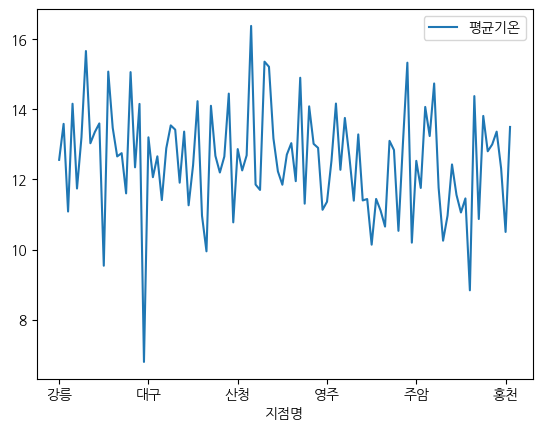

In [64]:
df_temp = df.groupby('지점명').aggregate({'평균기온':'mean'})
df_temp.plot()

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [ ]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

In [ ]:
df_temp = df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df_temp.plot()

### [실습문제] : 지점별 최고기온?

- 인텍스를 초기화 하는 방법

In [ ]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

### [실습문제] : 지점별 년도별 최다 월합강수량?

### [실습문제]  OO 지역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

#### # DataFrame에서 한 행씩 불러오기
!!![주의]!!! 데이터가 많을 경우 실행하지 않도록 (10만건 이상)

In [ ]:
# 한 행씩 불러오기  ---->
# for i, row in df_t.iterrows():
#     print(i, row)
#     print(i, row['지점명'], row['최고기온'])

#### 6.가공된 파일 신규 저장하기

In [66]:
# 가공된 데이터 신규 파일로 저장하기
file = 'sample_data/weather_data2.csv'
df.to_csv(file, encoding='cp949', mode='w', index=True)

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

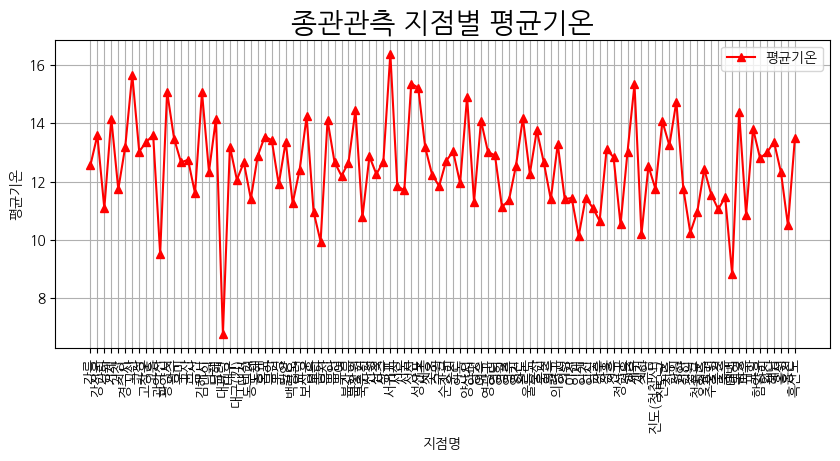

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = './sample_data/weather_data.csv'
# file = './sample_data/OBS_ASOS_MNH_20230830103358.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)


# 3.지점별 평균 구하기(지점 30개만 추출)
df_mean = df.groupby('지점명').aggregate({'평균기온':'mean'})

plt.plot(df_mean, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

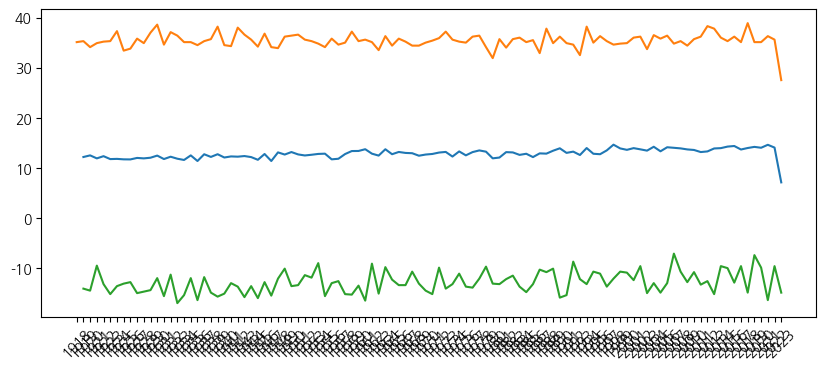

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus'] = False

# 1.데이터 불러오기
file = 'sample_data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.전주지역 데이터만 추출
df_junju =  df.query(" 지점명 == '전주'")
df_junju = df_junju.groupby('년도').aggregate({'평균기온':'mean', '최고기온':'max', '최저기온':'min' })
df_junju

plt.plot(df_junju)
plt.xticks(rotation=45)
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

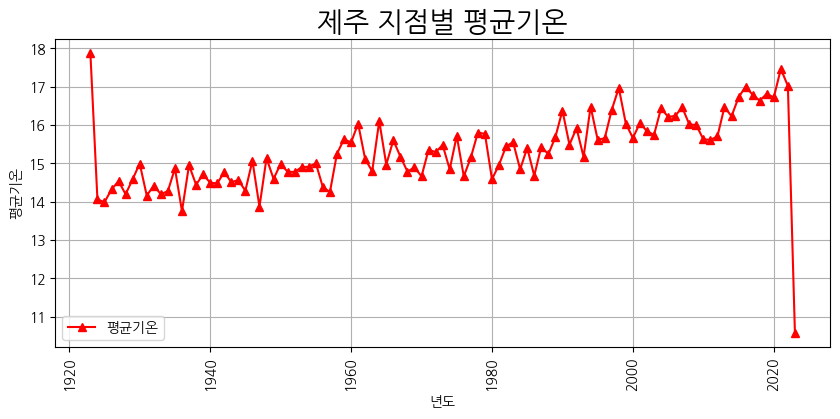

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = 'sample_data/weather_data2.csv'
df = pd.read_csv(file, encoding='CP949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 지점별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

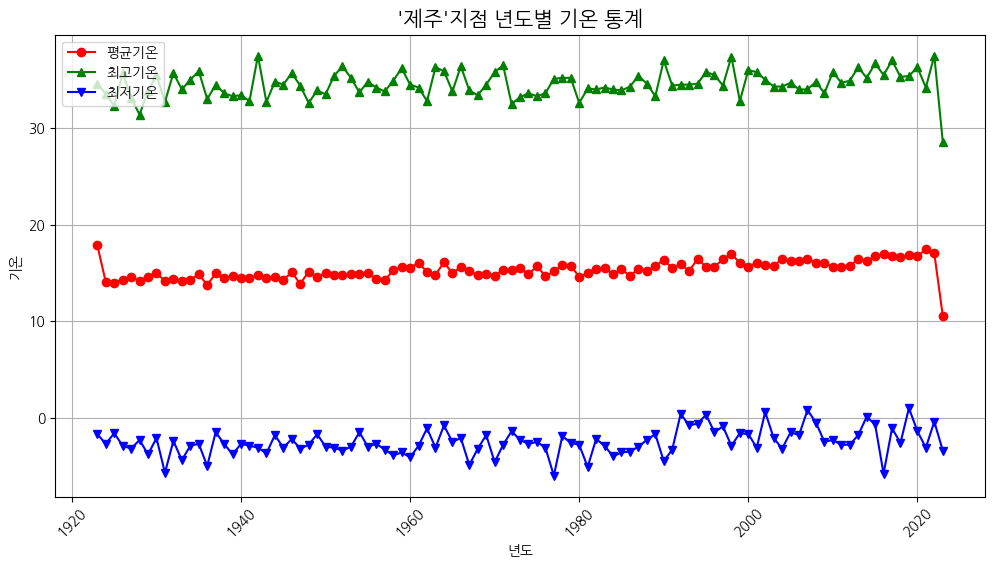

In [6]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


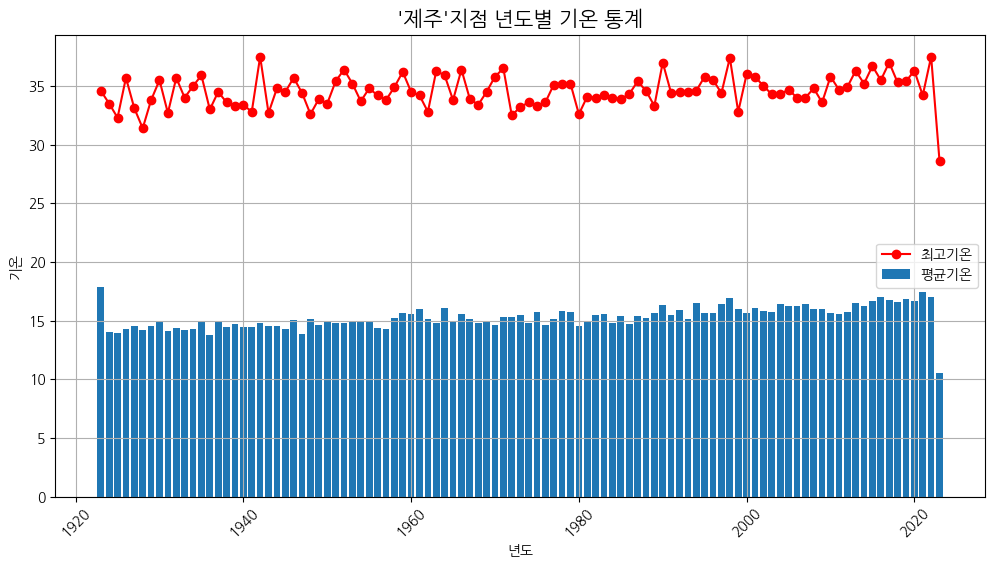

In [7]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

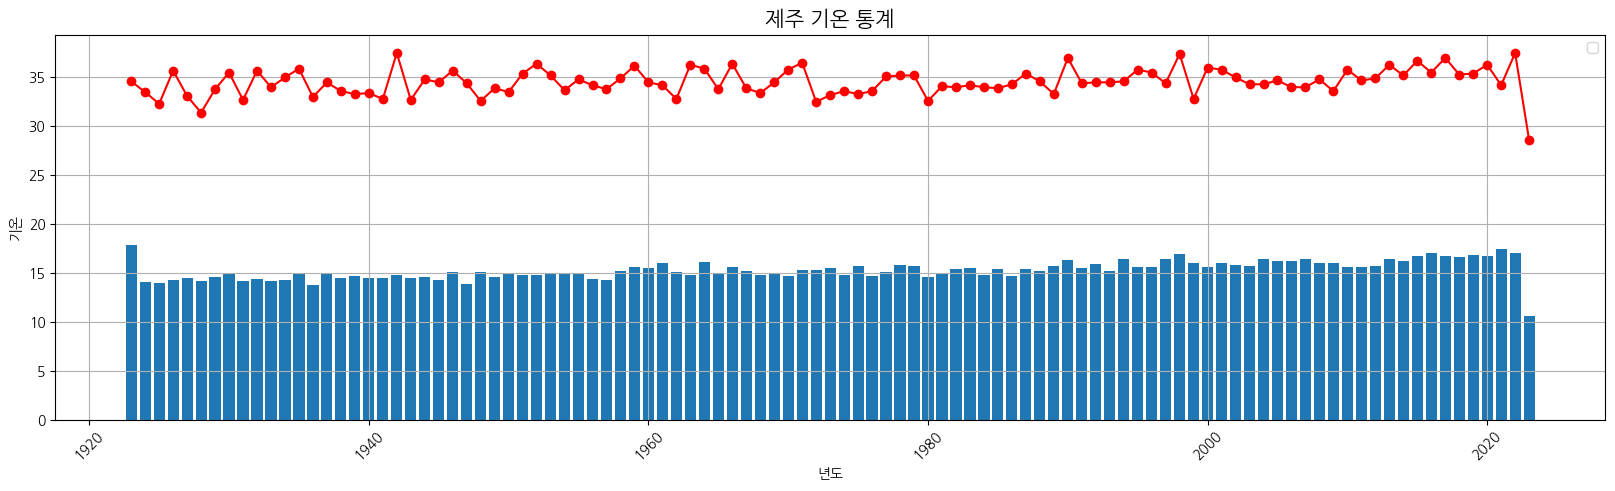

In [8]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

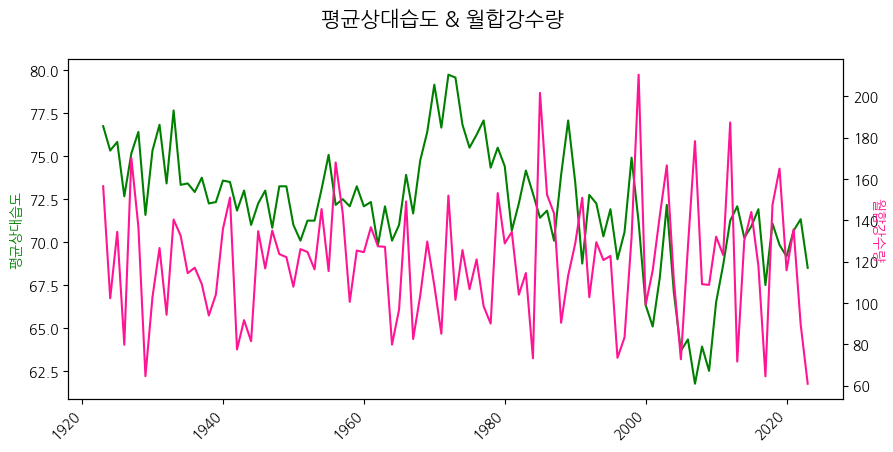

In [10]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

# plt.savefig('image/graph.png')

plt.show()

-------

---------

끝!